In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
X.shape

(70000, 784)

In [4]:
print("Each image is 28x28 =", 28*28)

Each image is 28x28 = 784


In [5]:
y.shape

(70000,)

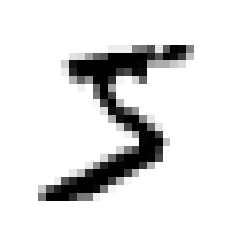

In [6]:
import matplotlib as mlp
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [7]:
print("target value of X[0] =", y[0])

target value of X[0] = 5


In [8]:
print("cast targets to int")
y = y.astype(np.uint8)

cast targets to int


In [9]:
print("Data set was shuffled which guarantees all cross-validate \n\
sets, and helps alleviate data sensitivity when the algorith\n\
is sensitive to the order of the data.")
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Data set was shuffled which guarantees all cross-validate 
sets, and helps alleviate data sensitivity when the algorith
is sensitive to the order of the data.


In [10]:
#make a binary classifier for 5 and not 5
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)


In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

print("Stratification seeks to ensure that each fold is representative of all strata of the data. Generally this is done in \
a supervised way for classification and aims to ensure each class is (approximately) equally represented across each test fold\
(which are of course combined in a complementary way to form training folds).")
print("\nA good resource for this is:\n\
https://stats.stackexchange.com/questions/49540/understanding-stratified-cross-validation")

Stratification seeks to ensure that each fold is representative of all strata of the data. Generally this is done in a supervised way for classification and aims to ensure each class is (approximately) equally represented across each test fold(which are of course combined in a complementary way to form training folds).

A good resource for this is:
https://stats.stackexchange.com/questions/49540/understanding-stratified-cross-validation


/home/chad/Documents/envs/hands_on_ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [14]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    #Clone does a deep copy of the model in an estimator without actually copying attached data. 
    #It yields a new estimator with the same parameters that has not been fit on any data.
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))  # prints 0.9502, 0.96565, and 0.96495

0.95035
0.96035
0.9604


In [15]:
print("check the cross validated accuracy of SGD classifier with k = 3")

check the cross validated accuracy of SGD classifier with k = 3


In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [17]:
print("What if we train not 5")

What if we train not 5


In [18]:
from sklearn.base import BaseEstimator

# as long as the class has fit and predict, we can inherit from BaseEstimator
# and call  
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        #make a column of 0 then cast it to a bool
        return np.zeros((len(X), 1), dtype=bool)

In [19]:
#example output for np.zeros
print(np.zeros((len(X), 1), dtype=bool))

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [20]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [21]:
print("The never 5 performs almost as well, so we can say the classifier\
doesn't do that well")

The never 5 performs almost as well, so we can say the classifierdoesn't do that well


In [22]:
print("Accuracy is not always a good measure with skewed data")

Accuracy is not always a good measure with skewed data


In [23]:
from sklearn.model_selection import cross_val_predict
# return predictions on data instead of a score
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
#format for the confusion matrix
#      1        0
#1    TP       FP
#0    FN       TN

array([[53892,   687],
       [ 1891,  3530]])

In [25]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [26]:
from sklearn.metrics import precision_score, recall_score
confusion_matrix(y_train_5, y_train_perfect_predictions)



array([[54579,     0],
       [    0,  5421]])

In [27]:
precision_score(y_train_5, y_train_pred) # == 3530 / (3530 + 687) == TP/(TP+FP)

0.8370879772350012

In [28]:
recall_score(y_train_5, y_train_pred) # == 3530 / (3530 + 1891) == TP/(TP+FN)

0.6511713705958311

In [29]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)
#TP/(TP + (FN + FP)/2)

0.7325171197343846

In [30]:
# reading to do's: precision/recall trade-off
# return a score for each instance
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [31]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[ True]


In [32]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


In [33]:
# how do you decide where the threshold is?
# use the cross_val_predict and return the decision function instead
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

#return the precision, recall and thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [34]:
# remove the last value from the recall and precision array
print(len(thresholds), len(recalls[:-1]), len(precisions[:-1]))

59966 59966 59966


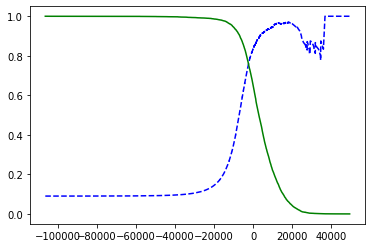

In [35]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold and add the legend, axis label, and grid

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [36]:
print("You may wonder why the precision curve is bumpier than the recall curve in Figure 3-4. \n\
The reason is that precision may sometimes go down when you raise the threshold (although \n\
in general it will go up). To understand why, look back at Figure 3-3 and notice what happens\n\
when you start from the central threshold and move it just one digit to the right: precision\n\
goes from 4/5 (80%) down to 3/4 (75%). On the other hand, recall can only go down when the\n\
threshold is increased, which explains why its curve looks smooth.")

You may wonder why the precision curve is bumpier than the recall curve in Figure 3-4. 
The reason is that precision may sometimes go down when you raise the threshold (although 
in general it will go up). To understand why, look back at Figure 3-3 and notice what happens
when you start from the central threshold and move it just one digit to the right: precision
goes from 4/5 (80%) down to 3/4 (75%). On the other hand, recall can only go down when the
threshold is increased, which explains why its curve looks smooth.


In [37]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # ~7816

In [38]:
print(threshold_90_precision)

3370.0194991439557


In [39]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [40]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [41]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [42]:
print("ROC Curve")
print("True Positive Rate against the False Positive Rate")

ROC Curve
True Positive Rate against the False Positive Rate


In [43]:
print("Things the ROC Curve Demonstrates,\n\n\
1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity\n\
will be accompanied by a decrease in specificity).\n\n\
2.The closer the curve follows the left-hand border and then the top border of the ROC space, the \n\
more accurate the test.\n\n\
3.The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.\n\n\
4.The slope of the tangent line at a cutpoint gives the likelihood ratio (LR) for that value of the test. \n\
You can check this out on the graph above. Recall that the LR for T4 < 5 is 52. This corresponds to the far\n\
left, steep portion of the curve. The LR for T4 > 9 is 0.2. This corresponds to the far right, nearly horizontal\n\
portion of the curve.\n\n\
5.The area under the curve is a measure of text accuracy.")



Things the ROC Curve Demonstrates,

1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity
will be accompanied by a decrease in specificity).

2.The closer the curve follows the left-hand border and then the top border of the ROC space, the 
more accurate the test.

3.The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4.The slope of the tangent line at a cutpoint gives the likelihood ratio (LR) for that value of the test. 
You can check this out on the graph above. Recall that the LR for T4 < 5 is 52. This corresponds to the far
left, steep portion of the curve. The LR for T4 > 9 is 0.2. This corresponds to the far right, nearly horizontal
portion of the curve.

5.The area under the curve is a measure of text accuracy.


In [44]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [45]:
print(fpr)

[0.         0.         0.         ... 0.99937705 0.99937705 1.        ]


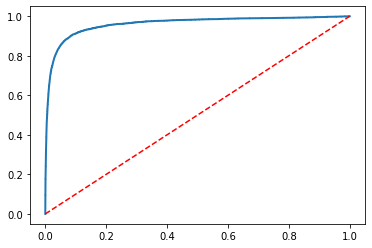

In [46]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r--') # Dashed diagonal

plot_roc_curve(fpr, tpr)
plt.show()


In [47]:
print("The higher the recall(TPR) the more the false positives(FPR) the classifier produces")
print("The red line represents a purely random classifier")

The higher the recall(TPR) the more the false positives(FPR) the classifier produces
The red line represents a purely random classifier


In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [49]:
print("The closer to 1 the better the classifier.")

The closer to 1 the better the classifier.


In [50]:
print("Since the ROC curve is so similar to the precision/recall (PR) curve, you may wonder how to decide\n\
which one to use. As a rule of thumb, you should prefer the PR curve whenever the positive class is\n\
rare or when you care more about the false positives than the false negatives. Otherwise, use the ROC\n\
curve. For example, looking at the previous ROC curve (and the ROC AUC score), you may think that the\n\
classifier is really good. But this is mostly because there are few positives (5s) compared to the\n\
negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for\n\
improvement (the curve could be closer to the top-right corner).")

Since the ROC curve is so similar to the precision/recall (PR) curve, you may wonder how to decide
which one to use. As a rule of thumb, you should prefer the PR curve whenever the positive class is
rare or when you care more about the false positives than the false negatives. Otherwise, use the ROC
curve. For example, looking at the previous ROC curve (and the ROC AUC score), you may think that the
classifier is really good. But this is mostly because there are few positives (5s) compared to the
negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for
improvement (the curve could be closer to the top-right corner).


In [51]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
#use predict_proba because random forest doesn't have a decision function
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [52]:
y_scores_forest = y_probas_forest[:, 1] 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [53]:
print(y_probas_forest)
#0       1      probablities of the negative class and the positive class

[[0.11 0.89]
 [0.99 0.01]
 [0.96 0.04]
 ...
 [0.02 0.98]
 [0.92 0.08]
 [0.94 0.06]]


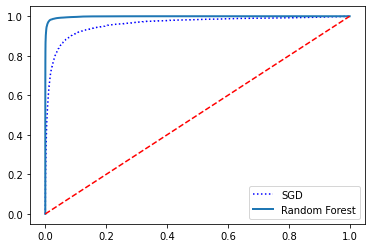

In [54]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [55]:
print("Random forest ROC Area Under the Curve score")

Random forest ROC Area Under the Curve score


In [56]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [57]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [58]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [59]:
np.argmax(some_digit_scores)

5

In [60]:
#list the targets
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [61]:
svm_clf.classes_[5]

5

In [62]:
print("SVG but forced to use the OnevsRest")


SVG but forced to use the OnevsRest


In [63]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [64]:
len(ovr_clf.estimators_)

10

In [65]:
print("SGD classifier")

SGD classifier


In [66]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [67]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [68]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [69]:
print("Transform X to be scaled and get a cross validated score again")

Transform X to be scaled and get a cross validated score again


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [71]:
print("Error analysis")

Error analysis


In [72]:
print("Confusion matrix of predictions")

Confusion matrix of predictions


In [73]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

In [74]:
print("Verify there are not fewer 5's in the data set and that the classifier performs as well\
as the other digits")

Verify there are not fewer 5's in the data set and that the classifier performs as wellas the other digits


In [75]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

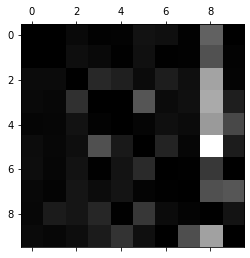

In [76]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

NameError: name 'plot_digits' is not defined

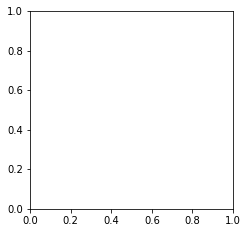

In [77]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()






In [78]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [79]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [80]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [81]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [82]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

NameError: name 'some_index' is not defined